In [104]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('GE.csv') # data frame 
print(df.shape)
df.head()

(504, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-03,64.800003,67.120003,64.639999,66.639999,66.072899,8456113
1,2019-09-04,67.279999,70.959999,67.199997,70.400002,69.800903,11706713
2,2019-09-05,71.919998,73.839996,70.400002,70.480003,69.880234,10861388
3,2019-09-06,70.559998,70.559998,68.559998,69.680000,69.087021,5355775
4,2019-09-09,70.000000,72.400002,69.839996,71.680000,71.070007,6245063


In [75]:
train_dates = pd.to_datetime(df['Date']) # seprate for future ploting
cols = list(df)[1:6] # variables for training
cols

['Open', 'High', 'Low', 'Close', 'Adj Close']

<AxesSubplot:>

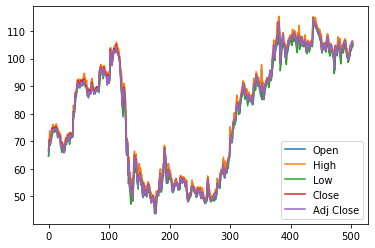

In [80]:
df_for_training = df[cols].astype(float)
df_for_plot = df_for_training.tail(5000)
df_for_plot.plot.line()

In [81]:
# LSTM uses tanh and sigmoid sensitive to magnitude/values so normalized needed
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled.shape[1]
df_for_training_scaled

array([[-0.73771521, -0.68932097, -0.68179146, -0.64729256, -0.66005967],
       [-0.62116689, -0.5093124 , -0.56116144, -0.47104219, -0.48555561],
       [-0.40310844, -0.37430597, -0.41037357, -0.46729214, -0.4818422 ],
       ...,
       [ 1.09980357,  1.14029926,  1.16818447,  1.20192848,  1.21309985],
       [ 1.21400231,  1.15483107,  1.21059354,  1.1597412 ,  1.17097205],
       [ 1.14867875,  1.15014344,  1.19457217,  1.17005381,  1.18127011]])

In [100]:
trainX = []
trainY = []

feature  = 1 # number of days wants to predict in future
look = 14  # no. of past days you want to  use for predicting future

for i in range(look, len(df_for_training_scaled) - feature +1):
    trainX.append(df_for_training_scaled[i - look:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + feature - 1 : i + feature, 0])

trainX = np.array(trainX)
trainY = np.array(trainY)
trainX[1]

array([[-0.62116689, -0.5093124 , -0.56116144, -0.47104219, -0.48555561],
       [-0.40310844, -0.37430597, -0.41037357, -0.46729214, -0.4818422 ],
       [-0.46702214, -0.52806336, -0.49707665, -0.50479233, -0.51897169],
       [-0.49333945, -0.44180898, -0.43676169, -0.4110422 , -0.42615014],
       [-0.43318543, -0.35930487, -0.3726769 , -0.34354197, -0.35931862],
       [-0.34295442, -0.32555355, -0.31236156, -0.26104215, -0.27763611],
       [-0.24896368, -0.26555031, -0.25204656, -0.29854196, -0.31476452],
       [-0.28280007, -0.29180187, -0.28220404, -0.26854197, -0.28131272],
       [-0.28655974, -0.30305227, -0.27089506, -0.25354195, -0.26644525],
       [-0.28655974, -0.31430273, -0.24073758, -0.26104215, -0.27387917],
       [-0.28280007, -0.31430273, -0.26712532, -0.25354195, -0.26644525],
       [-0.26776155, -0.27305086, -0.20681031, -0.23854193, -0.25157783],
       [-0.22640577, -0.25805013, -0.20681031, -0.25729205, -0.27016221],
       [-0.31663678, -0.31430273, -0.2

In [105]:
#model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]) ,return_sequences= True ))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 14, 64)            17920     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(trainX, trainY, batch_size=16, epochs=10, verbose=1, validation_split=0.1 )

Epoch 1/10
28/28 [==============================] - 1s 24ms/step - loss: 0.3330 - val_loss: 0.0316
Epoch 2/10
28/28 [==============================] - 0s 12ms/step - loss: 0.0952 - val_loss: 0.0215
Epoch 3/10
28/28 [==============================] - 0s 13ms/step - loss: 0.0761 - val_loss: 0.0215
Epoch 4/10
28/28 [==============================] - 0s 12ms/step - loss: 0.0727 - val_loss: 0.0175
Epoch 5/10
28/28 [==============================] - 0s 13ms/step - loss: 0.0630 - val_loss: 0.0135
Epoch 6/10
28/28 [==============================] - 0s 12ms/step - loss: 0.0593 - val_loss: 0.0150
Epoch 7/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0545 - val_loss: 0.0409
Epoch 8/10
28/28 [==============================] - 0s 13ms/step - loss: 0.0531 - val_loss: 0.0166
Epoch 9/10
28/28 [==============================] - 0s 13ms/step - loss: 0.0475 - val_loss: 0.0182
Epoch 10/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0444 - val_loss: 0.0107


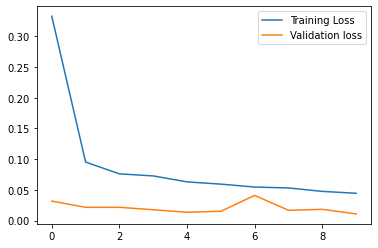

In [109]:
#ploting 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [175]:
# forecasting
# starting from last day in training date and predict future
n_future = 90
forecast_date_period = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()
forecast = model.predict(trainX[-n_future:])
forecast_copy = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_predict = scaler.inverse_transform(forecast_copy)[:,0]
y_predict.shape

(90,)

In [174]:
forecast_dates = [i.date() for i in forecast_date_period]
len(forecast_dates)

90

In [176]:
df_forecast = pd.DataFrame({'Date': np.array(forecast_dates), 'Open':np.array(y_predict)})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])
type(df_forecast)

pandas.core.frame.DataFrame

In [180]:
origional = df[['Date','Open']]
origional['Date'] = pd.to_datetime(origional['Date'])
origional = origional.loc[origional['Date']>='2021-1-24']

<ipython-input-180-a066438e6fbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origional['Date'] = pd.to_datetime(origional['Date'])


C:\Users\ashoaib\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashoaib\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

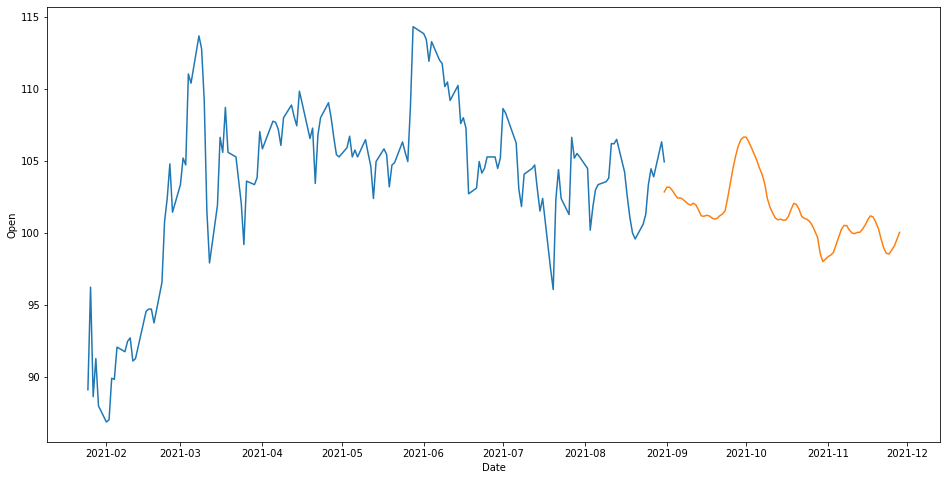

In [181]:
plt.figure(figsize=(16,8))
sns.lineplot(origional['Date'],origional['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])